In [305]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import json

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

Create the ResNet50 model.

In [306]:
resnet = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

In [307]:
img = image.load_img('./test-images/224x224x3/car-2.jpeg', target_size=(224, 224))

In [308]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [309]:
activation_layer = resnet.get_layer(name='conv5_block3_out')
final_dense = resnet.get_layer(name='predictions')

In [310]:
model = tf.keras.Model(inputs=resnet.inputs, outputs=[activation_layer.output, final_dense.output])

In [311]:
class_index, class_name = classifications[predicted[0]]
print(class_index, class_name)

817 sports_car


In [312]:
acts, preds = model.predict(x)

1/1 [==============================] - 0s 435ms/step


In [313]:
predicted = np.array(decode_predictions(preds, top=1)).flatten()

print(predicted)

['n04285008' 'sports_car' '0.6663153']


In [314]:
classifications = {
    key: (idx, value) 
    for (key, value, idx) in decode_predictions(np.expand_dims(np.arange(1000), 0), top=1000)[0][::-1]}

In [315]:
weights = final_dense.get_weights()

# get all of the output weights for the predicted classification
# weights[0] are the input weights and weights[1] are the output weights
pred_weights = np.array(weights[0])[:,class_index]
assert(len(pred_weights) == 2048)

In [316]:
acts[0].shape

(7, 7, 2048)

In [317]:
acts[0,:,:,1024]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.121918  , 0.30324817,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.8201431 ,
        0.53138125, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.880498  ,
        0.46202493, 0.        ],
       [0.40669012, 0.7934451 , 0.        , 0.        , 0.        ,
        0.        , 0.        ]], dtype=float32)

In [318]:
heat = np.dot(acts[0], pred_weights)
heat = sp.ndimage.zoom(heat, (32, 32), order=1)
heat.shape

(224, 224)

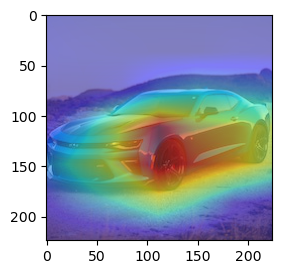

In [319]:
plt.subplot(1, 2, 1)
plt.imshow(img, alpha=0.8)
plt.imshow(heat, cmap='jet', alpha=0.5)
plt.show()